<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Workshop 9 - Clustering**

A partire dal dataset Iris, che potete caricare direttamente dalla libreria di sklearn e che abbiamo già analizzato in precedenza (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iri), utilizza e applica l'**algorimo KMeans** per trovare cluster nei dati. 

*Aiutino*: utilizza il metodo Elbow per trovare il numero ottimale di cluster e una volta trovati aiutati con degli scatterplot colorati per verificare la distribuzione dei cluster, evidenziandone i centroidi

In [1]:
#pip install yellowbrick

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans, SpectralClustering, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, confusion_matrix

# set plot size
plt.rcParams['figure.figsize'] = (10, 7)

import warnings
warnings.filterwarnings("ignore")

In [3]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
X = iris.data

In [4]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#Heat map Correlation matrix

fig = px.imshow(df_iris.corr(),x=list(df_iris.corr().columns),y=list(df_iris.corr().columns),width=500, height=500)
fig.show()

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
n_clusters=3
km = KMeans(n_clusters)
km.fit(X);

In [10]:
y_kmeans = km.predict(X)

In [11]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

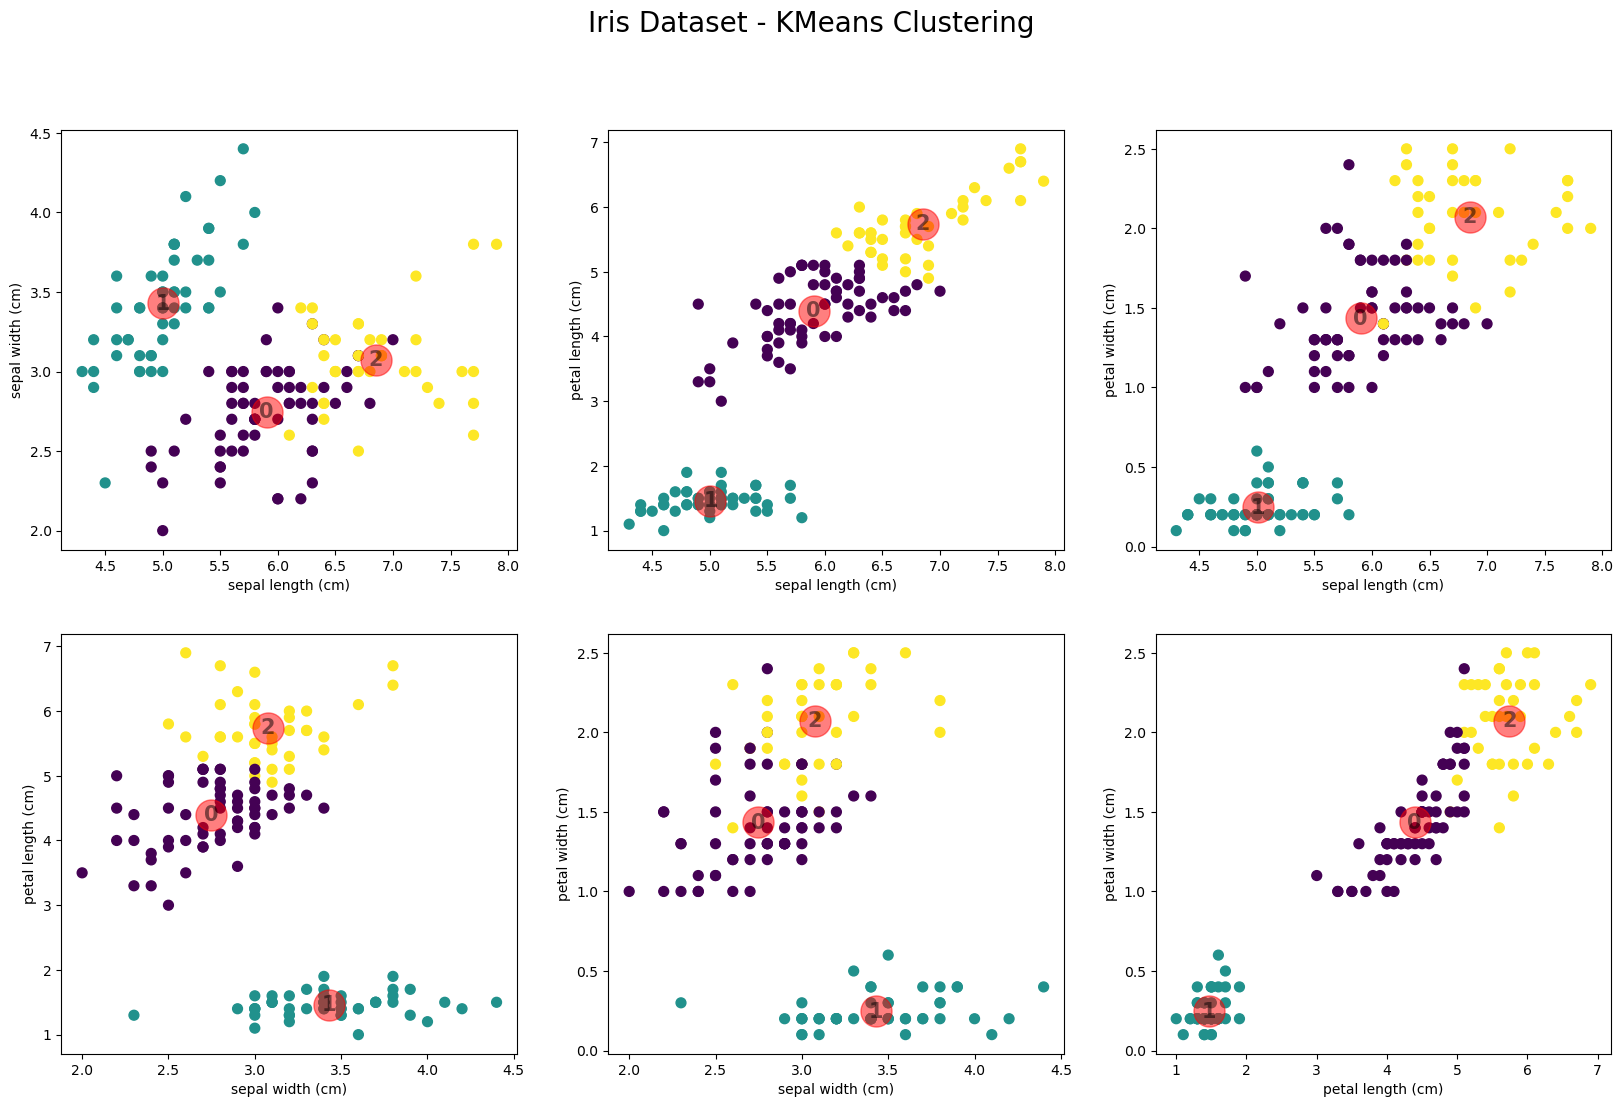

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12)) # 2 row, 3 columns of subplots

centers = km.cluster_centers_

axs[0,0].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)
axs[0,0].scatter(centers[:, 0], centers[:, 1],c='red', s=500, alpha=0.5);
axs[0,0].set_xlabel(df_iris.columns[0])
axs[0,0].set_ylabel(df_iris.columns[1])

for j in range(n_clusters):
    axs[0,0].text(centers[j,0],centers[j,1],f"{j}", horizontalalignment='center', verticalalignment='center', 
             fontdict=dict(color='k', alpha=0.5, size=15, weight='bold'))

axs[0,1].scatter(X[:, 0], X[:, 2], c=y_kmeans, s=50)
axs[0,1].scatter(centers[:, 0], centers[:, 2],c='red', s=500, alpha=0.5);
axs[0,1].set_xlabel(df_iris.columns[0])
axs[0,1].set_ylabel(df_iris.columns[2])

for j in range(n_clusters):
    axs[0,1].text(centers[j,0],centers[j,2],f"{j}", horizontalalignment='center', verticalalignment='center', 
             fontdict=dict(color='k', alpha=0.5, size=15, weight='bold'))
    
axs[0,2].scatter(X[:, 0], X[:, 3], c=y_kmeans, s=50)
axs[0,2].scatter(centers[:, 0], centers[:, 3],c='red', s=500, alpha=0.5);
axs[0,2].set_xlabel(df_iris.columns[0])
axs[0,2].set_ylabel(df_iris.columns[3])

for j in range(n_clusters):
    axs[0,2].text(centers[j,0],centers[j,3],f"{j}", horizontalalignment='center', verticalalignment='center', 
             fontdict=dict(color='k', alpha=0.5, size=15, weight='bold'))
    
axs[1,0].scatter(X[:, 1], X[:, 2], c=y_kmeans, s=50)
axs[1,0].scatter(centers[:, 1], centers[:, 2],c='red', s=500, alpha=0.5);
axs[1,0].set_xlabel(df_iris.columns[1])
axs[1,0].set_ylabel(df_iris.columns[2])

for j in range(n_clusters):
    axs[1,0].text(centers[j,1],centers[j,2],f"{j}", horizontalalignment='center', verticalalignment='center', 
             fontdict=dict(color='k', alpha=0.5, size=15, weight='bold'))

axs[1,1].scatter(X[:, 1], X[:, 3], c=y_kmeans, s=50)
axs[1,1].scatter(centers[:, 1], centers[:, 3],c='red', s=500, alpha=0.5);
axs[1,1].set_xlabel(df_iris.columns[1])
axs[1,1].set_ylabel(df_iris.columns[3])

for j in range(n_clusters):
    axs[1,1].text(centers[j,1],centers[j,3],f"{j}", horizontalalignment='center', verticalalignment='center', 
             fontdict=dict(color='k', alpha=0.5, size=15, weight='bold'))
    
axs[1,2].scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50)
axs[1,2].scatter(centers[:, 2], centers[:, 3],c='red', s=500, alpha=0.5);
axs[1,2].set_xlabel(df_iris.columns[2])
axs[1,2].set_ylabel(df_iris.columns[3])

for j in range(n_clusters):
    axs[1,2].text(centers[j,2],centers[j,3],f"{j}", horizontalalignment='center', verticalalignment='center', 
             fontdict=dict(color='k', alpha=0.5, size=15, weight='bold'))


fig.suptitle("Iris Dataset - KMeans Clustering", fontsize=20)
plt.show()

### Elbow Method

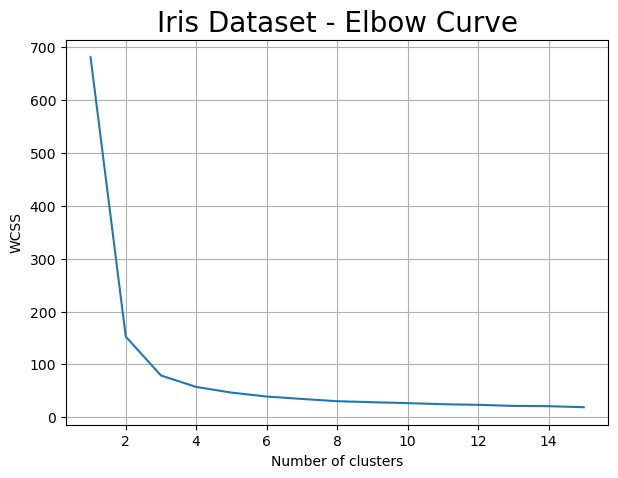

In [13]:
fig = plt.figure(figsize=(7, 5))

wcss = []

for i in range(1,16):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X)  # Fit the KMeans object to the dataset
    wcss.append(km.inertia_)
    
ks = range(1,16)
sns.lineplot(x = ks, y = wcss);

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Iris Dataset - Elbow Curve', fontsize=20)
plt.grid()
plt.show()

### Silhouette Score

In [14]:
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.285


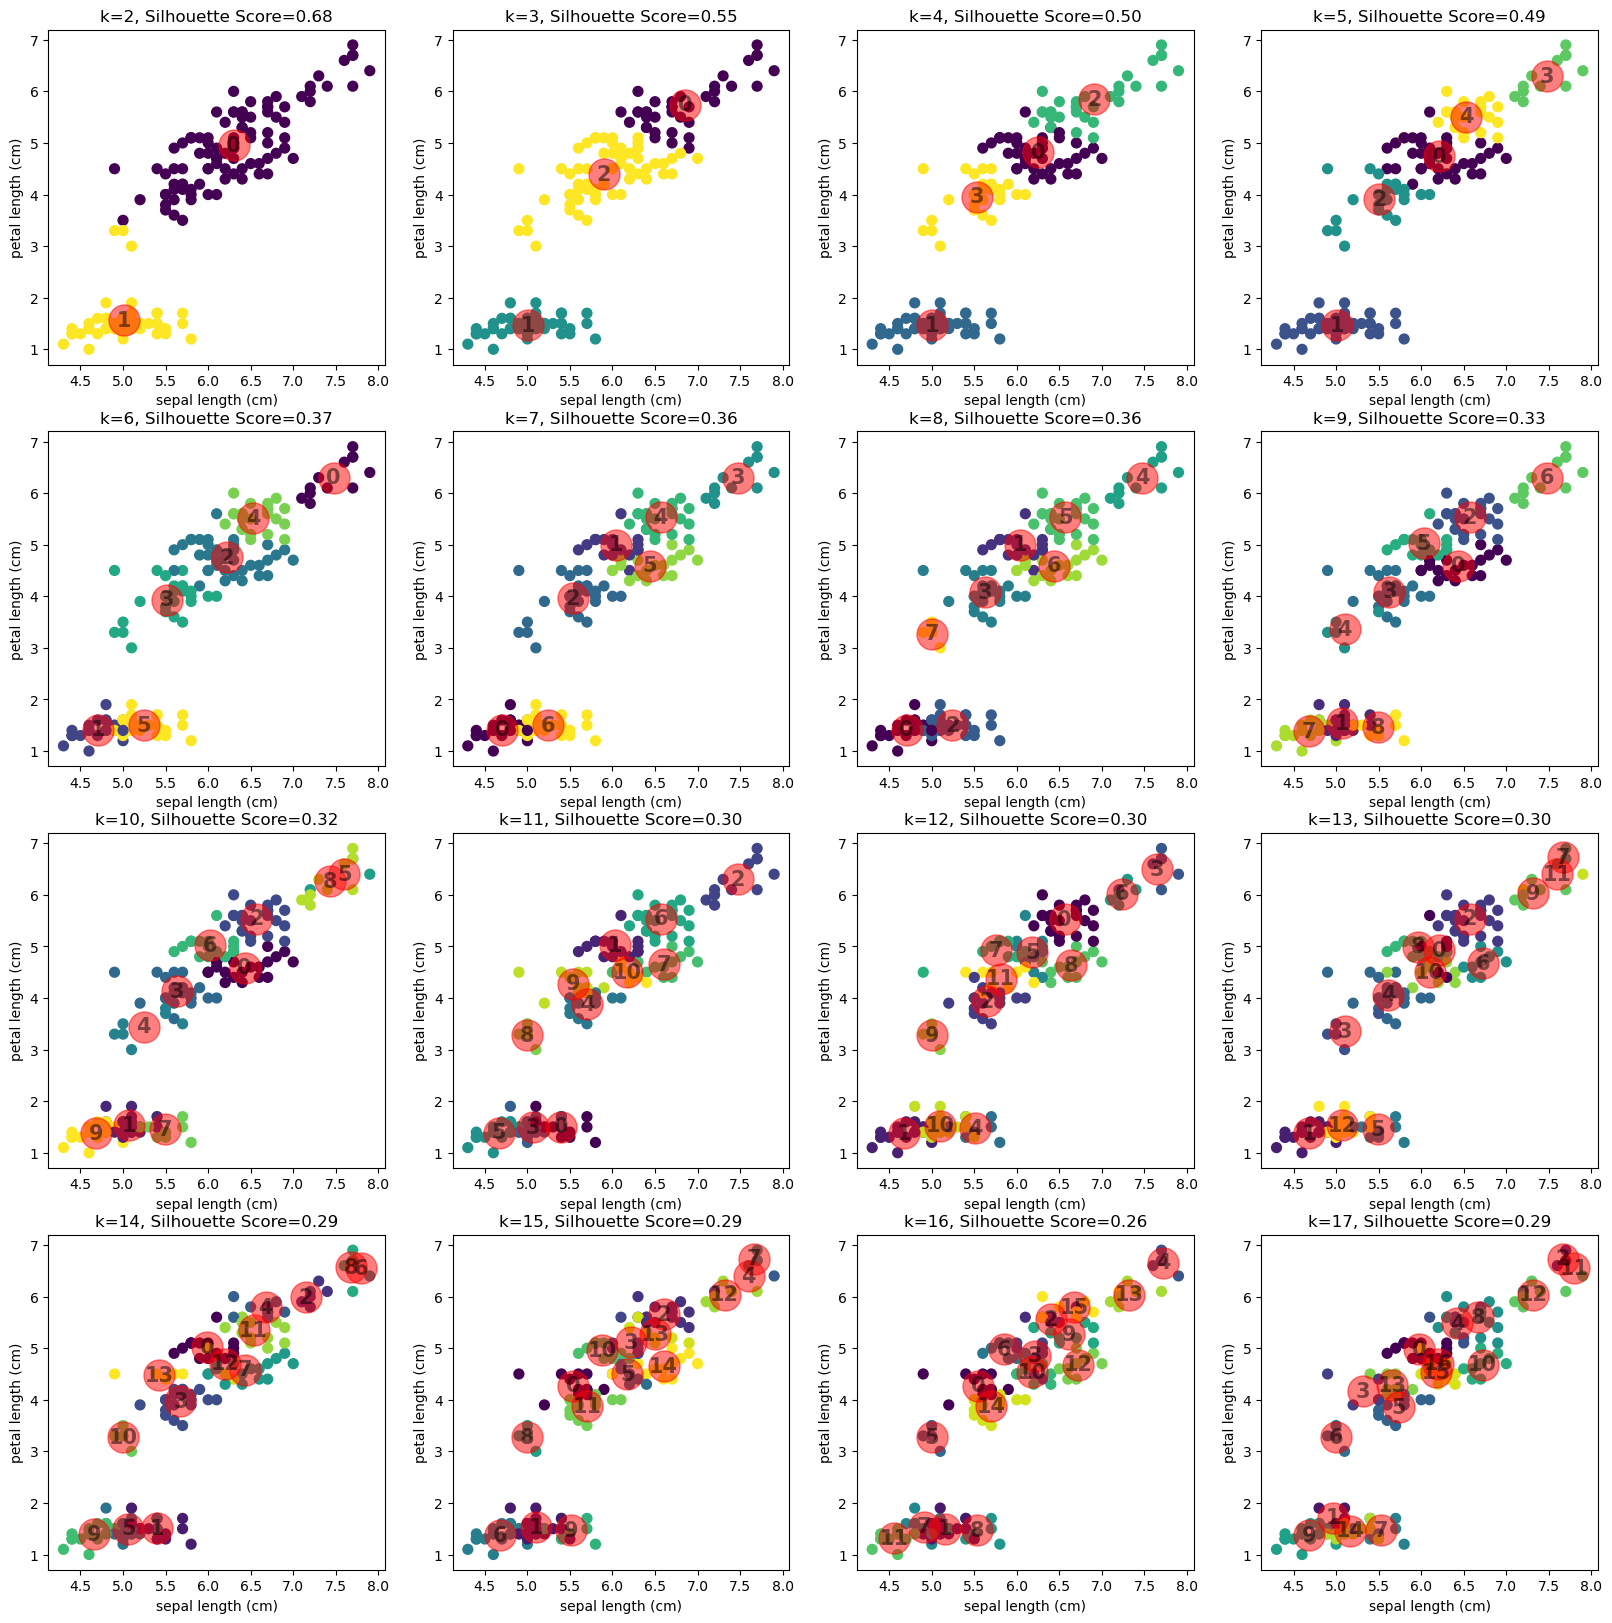

In [15]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20)) # 4 rows, 4 columns of subplots

sscore=[]

for i in range(16):
    y_kmeans=[]
    centers=[]
    km = KMeans(i+2)
    y_kmeans = km.fit_predict(X)
    centers = km.cluster_centers_
    score = silhouette_score(X, km.labels_, metric='euclidean')
    sscore.append(score)
    row = i // 4 # determine which row to plot the subplot on
    col = i % 4 # determine which column to plot the subplot on
    axs[row, col].scatter(X[:, 0], X[:, 2], c=y_kmeans, s=50)
    axs[row, col].scatter(centers[:, 0], centers[:, 2],c='red', s=500, alpha=0.5);
    axs[row, col].set_xlabel(df_iris.columns[0])
    axs[row, col].set_ylabel(df_iris.columns[2])
    axs[row, col].set_title(f'k={i+2}, Silhouette Score={score:.2f}')

    for j in range(i+2):
        axs[row, col].text(centers[j,0],centers[j,2],f"{j}", horizontalalignment='center', verticalalignment='center', 
             fontdict=dict(color='k', alpha=0.5, size=15, weight='bold'))

plt.show()

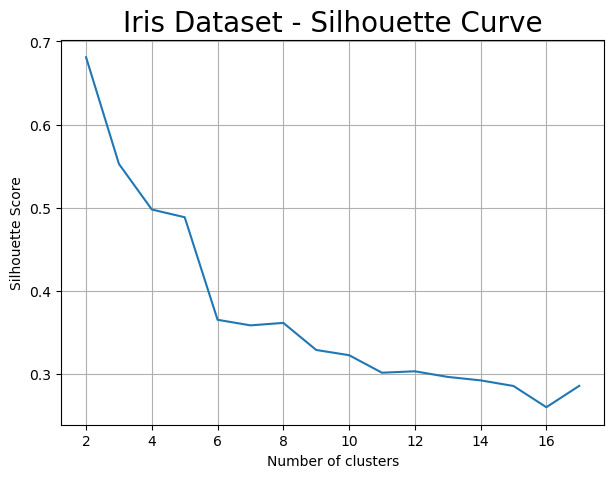

In [16]:
fig = plt.figure(figsize=(7, 5))

x=range(2,18)
sns.lineplot(x,sscore)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Iris Dataset - Silhouette Curve', fontsize=20)
plt.grid()
plt.show()

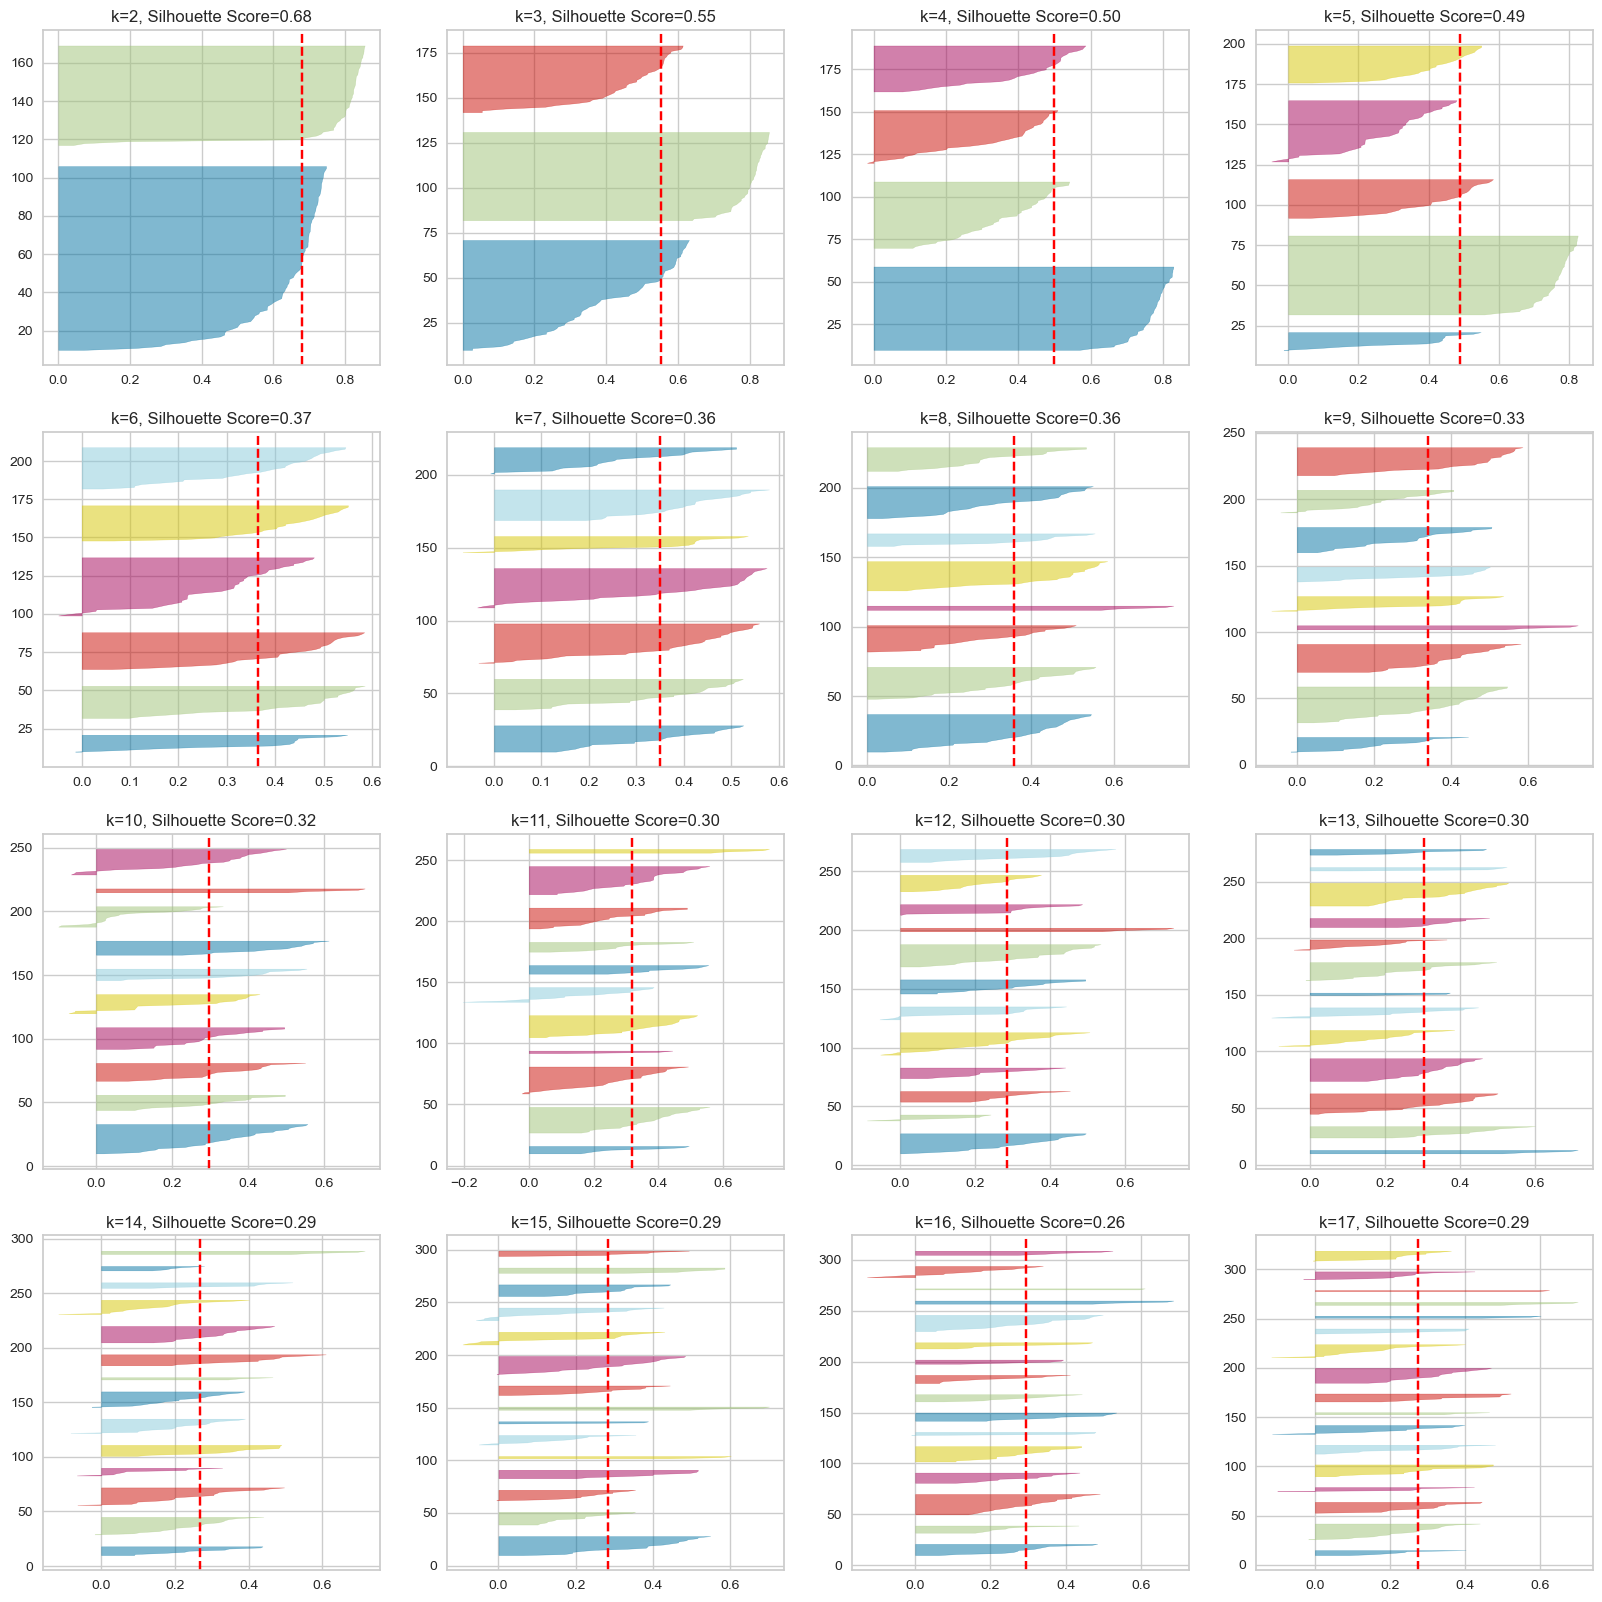

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, axs = plt.subplots(4, 4, figsize=(20, 20)) # 4 rows, 4 columns of subplots
for i in range(16):
    km = KMeans(n_clusters=i+2, init='k-means++', n_init=10, max_iter=100, random_state=42)
    row = i // 4 # determine which row to plot the subplot on
    col = i % 4 # determine which column to plot the subplot on
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=axs[row, col])
    visualizer.fit(X)
    axs[row, col].set_title(f'k={i+2}, Silhouette Score={sscore[i]:.2f}')

### Conclusioni

L'analisi di Silhouette indica un numero di cluster ottimale pari a due. Il Silhouette score con k=2 è infatti pari a 0.68 ed è il più alto fra quelli calcolati in un range che va da 2 a 17. La curva Elbow invece presenta un gomito a k=3, in perfetta sintonia con il numero di cluster del dataset iris.